In [2]:
from datasets import load_dataset

# Load the WikiTQ dataset
dataset = load_dataset("wikitablequestions")

# Select a split (train, validation, or test)
split = "train"  # Change to 'validation' or 'test' if needed
example = dataset[split][0]  # Get the first example

# Print the example
print("Question:", example["question"])
print("Table:", example["table"])
print("Answer:", example["answers"])

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: Loading wikitablequestions requires you to execute the dataset script in that repo on your local machine. Make sure you have read the code there to avoid malicious use, then set the option `trust_remote_code=True` to remove this error.

In [2]:
len(dataset[split])

11321

In [3]:
from PIL import Image, ImageDraw, ImageFont
import random

def table_vanilla_v(data_dict, cell_width=200, cell_height=50, font_size=20):
    """
    Converts a dictionary with headers and row values into a PIL table image with random column colors.

    :param data_dict: Dictionary containing 'header' (list) and 'rows' (nested list)
    :param cell_width: Width of each cell
    :param cell_height: Height of each cell
    :param font_size: Font size for text
    :return: PIL Image object with the table
    """

    headers = data_dict["header"]
    rows = data_dict["rows"]

    num_cols = len(headers)
    num_rows = len(rows) + 1  # +1 for the header row

    # Generate random colors for each column
    random.seed(0)

    # Calculate image size
    img_width = num_cols * cell_width
    img_height = num_rows * cell_height

    # Create image with white background
    img = Image.new("RGB", (img_width, img_height), "white")
    draw = ImageDraw.Draw(img)

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    # Draw the header row
    for col_idx, col_name in enumerate(headers):
        x = col_idx * cell_width
        draw.rectangle([x, 0, x + cell_width, cell_height], outline="black")
        draw.text((x + 10, 10), col_name, fill="black", font=font)

    # Draw the data rows with random column colors
    for row_idx, row in enumerate(rows):
        y = (row_idx + 1) * cell_height
        for col_idx, value in enumerate(row):
            x = col_idx * cell_width

            draw.rectangle([x, y, x + cell_width, y + cell_height], outline="black")
            draw.text((x + 10, y + 10), str(value), fill="black", font=font)

    return img


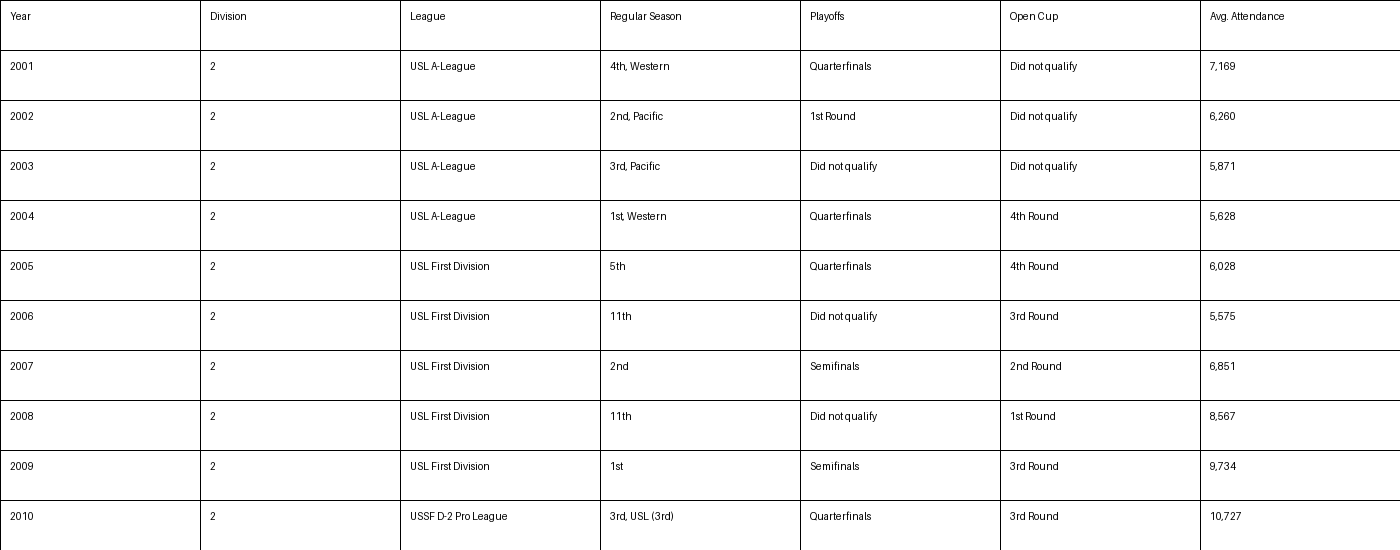

In [ ]:
table_image = table_vanilla_v(dataset[split][0]["table"])
table_image

In [4]:
from PIL import Image, ImageDraw, ImageFont
import random

def generate_random_color():
    """Generate a random pastel-like color."""
    return (random.randint(150, 255), random.randint(150, 255), random.randint(150, 255))

def table_column_color(data_dict, cell_width=200, cell_height=50, font_size=20):
    """
    Converts a dictionary with headers and row values into a PIL table image with random column colors.

    :param data_dict: Dictionary containing 'header' (list) and 'rows' (nested list)
    :param cell_width: Width of each cell
    :param cell_height: Height of each cell
    :param font_size: Font size for text
    :return: PIL Image object with the table
    """

    headers = data_dict["header"]
    rows = data_dict["rows"]

    num_cols = len(headers)
    num_rows = len(rows) + 1  # +1 for the header row

    # Generate random colors for each column
    random.seed(0)
    column_colors = {header: generate_random_color() for header in headers}

    # Calculate image size
    img_width = num_cols * cell_width
    img_height = num_rows * cell_height

    # Create image with white background
    img = Image.new("RGB", (img_width, img_height), "white")
    draw = ImageDraw.Draw(img)

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    # Draw the header row
    for col_idx, col_name in enumerate(headers):
        x = col_idx * cell_width
        draw.rectangle([x, 0, x + cell_width, cell_height], outline="black")
        draw.text((x + 10, 10), col_name, fill="black", font=font)

    # Draw the data rows with random column colors
    for row_idx, row in enumerate(rows):
        y = (row_idx + 1) * cell_height
        for col_idx, value in enumerate(row):
            x = col_idx * cell_width
            fill_color = column_colors[headers[col_idx]]  # Assign random color per column

            draw.rectangle([x, y, x + cell_width, y + cell_height], fill=fill_color, outline="black")
            draw.text((x + 10, y + 10), str(value), fill="black", font=font)

    return img


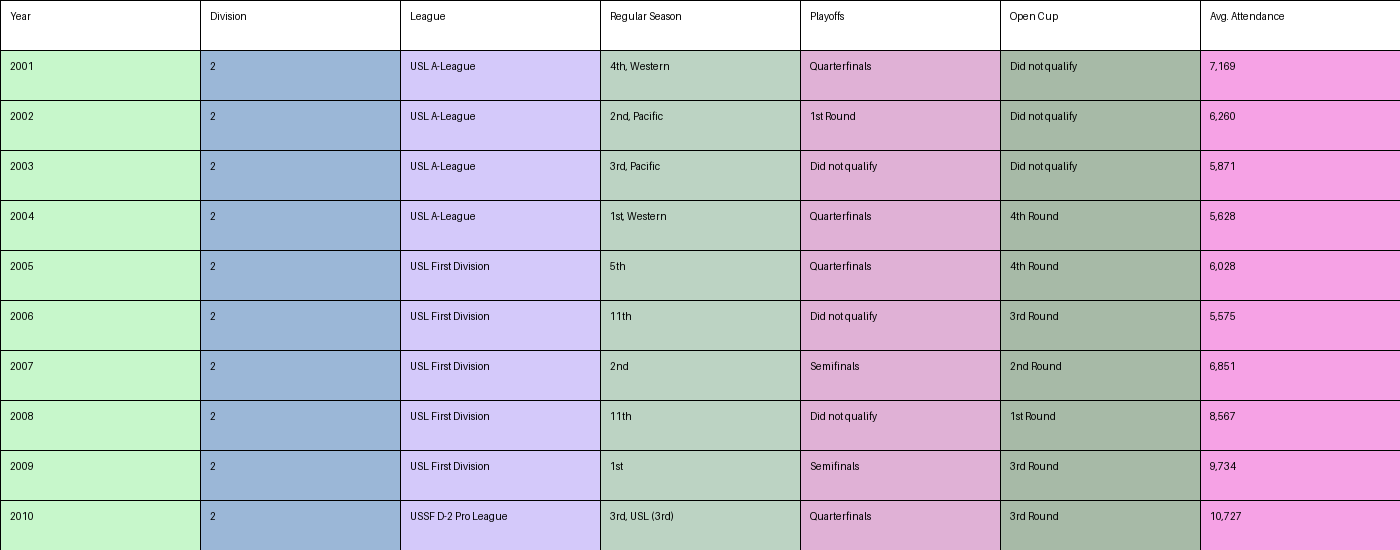

In [5]:
table_image = table_column_color(dataset[split][0]["table"])
table_image

In [5]:
def table_row_color(data_dict, cell_width=200, cell_height=50, font_size=20):
    """
    Converts a dictionary with headers and row values into a PIL table image with random row colors.

    :param data_dict: Dictionary containing 'header' (list) and 'rows' (nested list)
    :param cell_width: Width of each cell
    :param cell_height: Height of each cell
    :param font_size: Font size for text
    :return: PIL Image object with the table
    """

    headers = data_dict["header"]
    rows = data_dict["rows"]

    num_cols = len(headers)
    num_rows = len(rows) + 1  # +1 for the header row

    # Generate random colors for each row
    random.seed(0)
    row_colors = [generate_random_color() for _ in range(len(rows))]

    # Calculate image size
    img_width = num_cols * cell_width
    img_height = num_rows * cell_height

    # Create image with white background
    img = Image.new("RGB", (img_width, img_height), "white")
    draw = ImageDraw.Draw(img)

    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    # Draw the header row
    for col_idx, col_name in enumerate(headers):
        x = col_idx * cell_width
        draw.rectangle([x, 0, x + cell_width, cell_height], outline="black")
        draw.text((x + 10, 10), col_name, fill="black", font=font)

    # Draw the data rows with random colors per row
    for row_idx, row in enumerate(rows):
        y = (row_idx + 1) * cell_height
        row_color = row_colors[row_idx]  # Assign random color per row
        for col_idx, value in enumerate(row):
            x = col_idx * cell_width

            draw.rectangle([x, y, x + cell_width, y + cell_height], fill=row_color, outline="black")
            draw.text((x + 10, y + 10), str(value), fill="black", font=font)

    return img



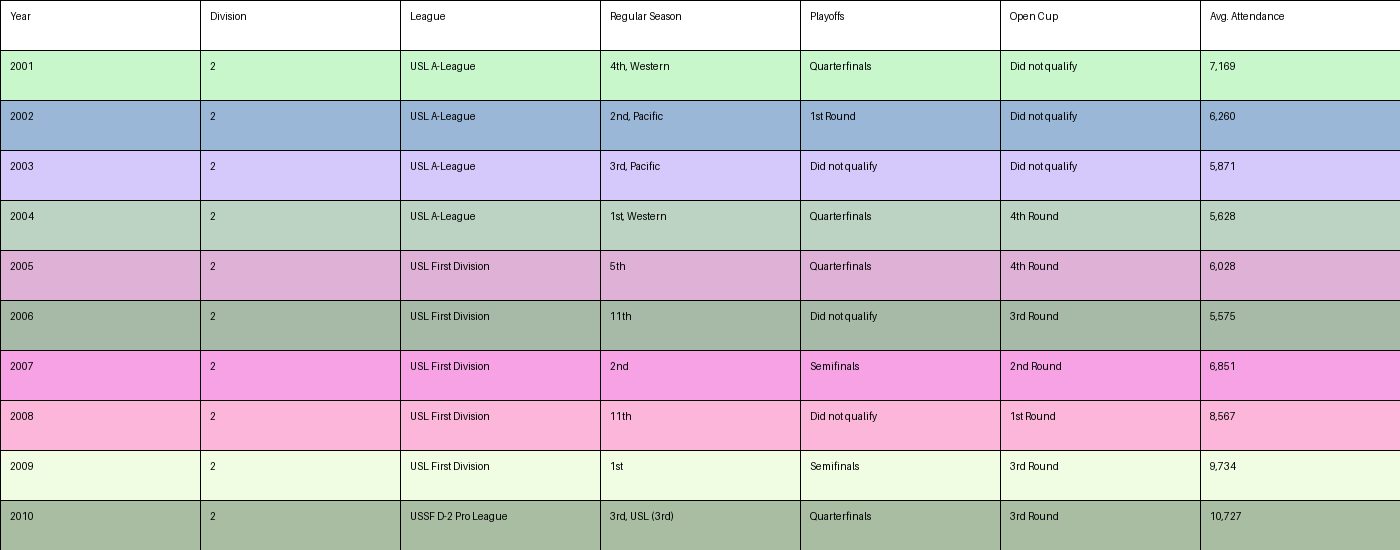

In [ ]:
table_image = table_row_color(dataset[split][0]["table"])
table_image

In [6]:
def format_vanilla_T(data_dict):
    """Format 1: Outputs all values sequentially."""
    headers = data_dict["header"]
    rows = data_dict["rows"]
    return ", ".join(headers + [str(value) for row in rows for value in row]) + ", "

def format_row_identifier(data_dict):
    """Format 2: Outputs all values sequentially with [ROW#] markers."""
    headers = data_dict["header"]
    rows = data_dict["rows"]
    formatted_rows = [f"[ROW{idx+1}] " + ", ".join(map(str, row)) for idx, row in enumerate(rows)]
    return ", ".join(headers) + ", " + ", ".join(formatted_rows) + ", "

def format_bracket(data_dict):
    """Format 3: Outputs as nested lists."""
    headers = data_dict["header"]
    rows = data_dict["rows"]
    nested_list = [headers] + rows
    return str(nested_list)

def format_column_json(data_dict):
    """Format 4: Outputs as a dictionary where each column is a key."""
    headers = data_dict["header"]
    rows = data_dict["rows"]
    column_dict = {header: [row[idx] for row in rows] for idx, header in enumerate(headers)}
    return str(column_dict)

def format_row_json(data_dict):
    """Format 5: Outputs rows as dictionaries."""
    headers = data_dict["header"]
    rows = data_dict["rows"]
    row_dicts = [{"Row": idx + 1, **dict(zip(headers, row))} for idx, row in enumerate(rows)]
    return str(row_dicts)

In [9]:
question = dataset[split][0]["question"]

data = dataset[split][0]["table"]
output1 = format_vanilla_T(data)
output2 = format_row_identifier(data)
output3 = format_bracket(data)
output4 = format_column_json(data)
output5 = format_row_json(data)

answer =  dataset[split][0]["answers"]

In [15]:
import json
import os
from PIL import Image
from tqdm import tqdm

def process_wikiTQ(dataset, output_dir="wikiTQ_data", batch_size=1000):
    # Dictionary to store all splits together
    all_splits = {"train": [], "test": [], "validation": []}

    for split in all_splits.keys():  # Iterate over "train", "test", "validation"
        if split not in dataset:
            continue  # Skip if a split does not exist

        batch_count = 0
        img_dirs = {}

        for idx, entry in tqdm(enumerate(dataset[split]), total=len(dataset[split]), desc=f"Processing {split} split"):
            # Create new batch folder every 1000 images
            if idx % batch_size == 0:
                batch_count += 1
                batch_folder = f"batch_{batch_count}"
                img_dirs = {
                    "table_vanilla_v": os.path.join(output_dir, batch_folder, "table_vanilla_v"),
                    "table_column_color": os.path.join(output_dir, batch_folder, "table_column_color"),
                    "table_row_color": os.path.join(output_dir, batch_folder, "table_row_color"),
                }

                for img_dir in img_dirs.values():
                    os.makedirs(img_dir, exist_ok=True)

            question = entry["question"]
            answer = entry["answers"]

            # Format outputs
            output1 = format_vanilla_T(entry["table"])
            output2 = format_row_identifier(entry["table"])
            output3 = format_bracket(entry["table"])
            output4 = format_column_json(entry["table"])
            output5 = format_row_json(entry["table"])

            # Generate images
            img_vanilla = table_vanilla_v(entry["table"])
            img_column_color = table_column_color(entry["table"])
            img_row_color = table_row_color(entry["table"])

            # Define image paths in their respective batch folders
            img_vanilla_path = os.path.join(img_dirs["table_vanilla_v"], f"{split}_entry_{idx}.png")
            img_column_color_path = os.path.join(img_dirs["table_column_color"], f"{split}_entry_{idx}.png")
            img_row_color_path = os.path.join(img_dirs["table_row_color"], f"{split}_entry_{idx}.png")

            # Save images in respective batch folders
            img_vanilla.save(img_vanilla_path)
            img_column_color.save(img_column_color_path)
            img_row_color.save(img_row_color_path)

            # Store results without table data
            result_entry = {
                "question": question,
                "tables": {
                    "vanilla_T": output1,
                    "row_identifier": output2,
                    "bracket": output3,
                    "column_json": output4,
                    "row_json": output5,
                    "images": {
                        "table_vanilla_v": img_vanilla_path,
                        "table_column_color": img_column_color_path,
                        "table_row_color": img_row_color_path
                    }
                },
                "answer": answer
            }

            all_splits[split].append(result_entry)

    # Save all splits in a single JSON file
    json_path = os.path.join(output_dir, "wikiTQ_all_splits.json")
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(all_splits, f, indent=4, ensure_ascii=False)


In [16]:
process_wikiTQ(dataset)

Processing validation split: 100%|██████████| 2831/2831 [05:52<00:00,  8.02it/s]


In [ ]:
import shutil

folder_to_zip = "wikiTQ_data"  # Change this to your folder name
shutil.make_archive(folder_to_zip, 'zip', folder_to_zip)

'/content/wikiTQ_data.zip'

In [ ]:
from google.colab import files

files.download("wikiTQ_data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataset["train"]

Dataset({
    features: ['id', 'question', 'answers', 'table'],
    num_rows: 11321
})

In [7]:
from datasets import load_dataset

def load_finqa():
    """Load FinQA dataset from Hugging Face."""
    return load_dataset("gagan3012/finqa-updated")

def load_tabfact():
    """Load TabFact dataset from Hugging Face."""
    return load_dataset("ibm-research/tab_fact")

def load_e2e():
    """Load E2E dataset from Hugging Face."""
    return load_dataset("tuetschek/e2e_nlg")

def load_totto():
    """Load ToTTo dataset from Hugging Face."""
    return load_dataset("google-research-datasets/totto")

def load_logicnlg():
    """Load LogicNLG dataset from Hugging Face."""
    return load_dataset("kasnerz/logicnlg")



In [8]:
test_dataset = load_tabfact()

Generating train split: 92283 examples [00:04, 18538.70 examples/s]
Generating validation split: 12792 examples [00:00, 16830.71 examples/s]
Generating test split: 12779 examples [00:00, 20114.96 examples/s]


In [ ]:
test_dataset['train']

Dataset({
    features: ['id', 'table', 'statement', 'label'],
    num_rows: 92283
})

In [ ]:
test_dataset['train']['table'][0]

{'id': '2-15401676-3.html.csv',
 'header': ['date', 'result', 'score', 'brazil scorers', 'competition'],
 'rows': [['may 11 , 1919',
   'w',
   '6 - 0',
   'friedenreich (3) , neco (2) , haroldo',
   'south american championship'],
  ['may 18 , 1919',
   'w',
   '3 - 1',
   'heitor , amílcar , millon',
   'south american championship'],
  ['may 26 , 1919', 'd', '2 - 2', 'neco (2)', 'south american championship'],
  ['may 29 , 1919',
   'w',
   '1 - 0',
   'friedenreich',
   'south american championship'],
  ['june 1 , 1919',
   'd',
   '3 - 3',
   'haroldo , arlindo (2)',
   'taça roberto cherry']],
 'caption': '1919 in brazilian football'}

In [10]:
split = "train"

In [11]:
question = test_dataset[split][0]["statement"]

data = test_dataset[split][0]["table"]
output1 = format_vanilla_T(data)
output2 = format_row_identifier(data)
output3 = format_bracket(data)
output4 = format_column_json(data)
output5 = format_row_json(data)

img_vanilla = table_vanilla_v(data)

answer =  test_dataset[split][0]["label"]

In [22]:
import json
import os
from PIL import Image
from tqdm import tqdm

def process_tabFact(dataset, output_dir="tabFact_data", batch_size=10000):
    # Dictionary to store all splits together
    all_splits = {"train": [], "test": [], "validation": []}

    for split in all_splits.keys():  # Iterate over "train", "test", "validation"
        if split not in dataset:
            continue  # Skip if a split does not exist

        batch_count = 0
        img_dirs = {}

        for idx, entry in tqdm(enumerate(dataset[split]), total=len(dataset[split]), desc=f"Processing {split} split"):
            # Create new batch folder every 1000 images
            if idx % batch_size == 0:
                batch_count += 1
                batch_folder = f"batch_{batch_count}"
                img_dirs = {
                    "table_vanilla_v": os.path.join(output_dir, batch_folder, "table_vanilla_v"),
                    "table_column_color": os.path.join(output_dir, batch_folder, "table_column_color"),
                    "table_row_color": os.path.join(output_dir, batch_folder, "table_row_color"),
                }

                for img_dir in img_dirs.values():
                    os.makedirs(img_dir, exist_ok=True)

            question = entry["statement"]
            answer = entry["label"]

            # Format outputs
            output1 = format_vanilla_T(entry["table"])
            output2 = format_row_identifier(entry["table"])
            output3 = format_bracket(entry["table"])
            output4 = format_column_json(entry["table"])
            output5 = format_row_json(entry["table"])

            # Generate images
            img_vanilla = table_vanilla_v(entry["table"])
            img_column_color = table_column_color(entry["table"])
            img_row_color = table_row_color(entry["table"])

            # Define image paths in their respective batch folders
            img_vanilla_path = os.path.join(img_dirs["table_vanilla_v"], f"{split}_entry_{idx}.png")
            img_column_color_path = os.path.join(img_dirs["table_column_color"], f"{split}_entry_{idx}.png")
            img_row_color_path = os.path.join(img_dirs["table_row_color"], f"{split}_entry_{idx}.png")

            # Save images in respective batch folders
            img_vanilla.save(img_vanilla_path)
            img_column_color.save(img_column_color_path)
            img_row_color.save(img_row_color_path)

            # Store results without table data
            result_entry = {
                "question": question,
                "tables": {
                    "vanilla_T": output1,
                    "row_identifier": output2,
                    "bracket": output3,
                    "column_json": output4,
                    "row_json": output5,
                    "images": {
                        "table_vanilla_v": img_vanilla_path,
                        "table_column_color": img_column_color_path,
                        "table_row_color": img_row_color_path
                    }
                },
                "answer": answer
            }

            all_splits[split].append(result_entry)

    # Save all splits in a single JSON file
    json_path = os.path.join(output_dir, "wikiTQ_all_splits.json")
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(all_splits, f, indent=4, ensure_ascii=False)


In [23]:
process_tabFact(test_dataset)

Processing validation split: 100%|██████████| 12792/12792 [13:58<00:00, 15.26it/s]


In [16]:
finqa_data = load_finqa()

Generating test split: 100%|██████████| 1147/1147 [00:00<00:00, 83263.24 examples/s]


In [ ]:
finqa_data['train']

Dataset({
    features: ['id', 'query', 'answer', 'text'],
    num_rows: 6251
})

In [ ]:
finqa_data['train']['query'][0]

'Please answer the following financial question based on the context provided. Make sure to give the answer in raw number, not in percentage and without any units. If the question asks for percentage the value should be less than 1\nContext:\ninterest rate to a variable interest rate based on the three-month libor plus 2.05% ( 2.05 % ) ( 2.34% ( 2.34 % ) as of october 31 , 2009 ) . if libor changes by 100 basis points , our annual interest expense would change by $ 3.8 million . foreign currency exposure as more fully described in note 2i . in the notes to consolidated financial statements contained in item 8 of this annual report on form 10-k , we regularly hedge our non-u.s . dollar-based exposures by entering into forward foreign currency exchange contracts . the terms of these contracts are for periods matching the duration of the underlying exposure and generally range from one month to twelve months . currently , our largest foreign currency exposure is the euro , primarily becau

In [20]:
finqa_data['train'][0]

{'id': 'finqa0',
 'query': 'Please answer the following financial question based on the context provided. Make sure to give the answer in raw number, not in percentage and without any units. If the question asks for percentage the value should be less than 1\nContext:\ninterest rate to a variable interest rate based on the three-month libor plus 2.05% ( 2.05 % ) ( 2.34% ( 2.34 % ) as of october 31 , 2009 ) . if libor changes by 100 basis points , our annual interest expense would change by $ 3.8 million . foreign currency exposure as more fully described in note 2i . in the notes to consolidated financial statements contained in item 8 of this annual report on form 10-k , we regularly hedge our non-u.s . dollar-based exposures by entering into forward foreign currency exchange contracts . the terms of these contracts are for periods matching the duration of the underlying exposure and generally range from one month to twelve months . currently , our largest foreign currency exposure is

In [17]:
question = finqa_data[split][0]["query"]

data = finqa_data[split][0]["table"]
output1 = format_vanilla_T(data)
output2 = format_row_identifier(data)
output3 = format_bracket(data)
output4 = format_column_json(data)
output5 = format_row_json(data)

img_vanilla = table_vanilla_v(data)

answer =  finqa_data[split][0]["answers"]

KeyError: 'table'

In [ ]:
e2e_data = load_e2e()

README.md:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

e2e_nlg.py:   0%|          | 0.00/3.60k [00:00<?, ?B/s]

The repository for tuetschek/e2e_nlg contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tuetschek/e2e_nlg.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/42061 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4672 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4693 [00:00<?, ? examples/s]

In [ ]:
e2e_data['train']

Dataset({
    features: ['meaning_representation', 'human_reference'],
    num_rows: 42061
})

In [ ]:
e2e_data['train']['meaning_representation'][0]

'name[The Vaults], eatType[pub], priceRange[more than £30], customer rating[5 out of 5], near[Café Adriatic]'

In [ ]:
totto_data = load_totto()

README.md:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

totto.py:   0%|          | 0.00/5.58k [00:00<?, ?B/s]

The repository for google-research-datasets/totto contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google-research-datasets/totto.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/120761 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7700 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7700 [00:00<?, ? examples/s]

In [ ]:
totto_data['train']

Dataset({
    features: ['id', 'table_page_title', 'table_webpage_url', 'table_section_title', 'table_section_text', 'table', 'highlighted_cells', 'example_id', 'sentence_annotations', 'overlap_subset'],
    num_rows: 120761
})

In [ ]:
finqa_data = load_finqa()
# tabfact_data = load_tabfact()
e2e_data = load_e2e()

logicnlg_data = load_logicnlg()

README.md:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

e2e_nlg.py:   0%|          | 0.00/3.60k [00:00<?, ?B/s]

The repository for tuetschek/e2e_nlg contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tuetschek/e2e_nlg.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/42061 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4672 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4693 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

totto.py:   0%|          | 0.00/5.58k [00:00<?, ?B/s]

The repository for google-research-datasets/totto contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google-research-datasets/totto.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/120761 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7700 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7700 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/296 [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

(…)-00000-of-00001-08a5c3058b9d32de.parquet:   0%|          | 0.00/5.94M [00:00<?, ?B/s]

(…)-00000-of-00001-d4b9a136c03300b5.parquet:   0%|          | 0.00/889k [00:00<?, ?B/s]

(…)-00000-of-00001-d6801bbd3e228479.parquet:   0%|          | 0.00/874k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/28450 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4260 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4305 [00:00<?, ? examples/s]

In [ ]:
e2e_data["train"]

Dataset({
    features: ['meaning_representation', 'human_reference'],
    num_rows: 42061
})

In [ ]:
totto_data["train"]

Dataset({
    features: ['id', 'table_page_title', 'table_webpage_url', 'table_section_title', 'table_section_text', 'table', 'highlighted_cells', 'example_id', 'sentence_annotations', 'overlap_subset'],
    num_rows: 120761
})

In [ ]:
logicnlg_data["train"]

Dataset({
    features: ['table', 'ref', 'linked_columns', 'title', 'template', 'table_id'],
    num_rows: 28450
})